# Aviation Data Cleaning and Analysis

## Introduction

In this notebook, I shall focus on cleaning and analyzing data from the `AviationData.csv` dataset. This particular dataset was provided by the National Safety and Transport Board and it contains information about aviation accidents from the year 1962 to the year 2023. The goal is to identify patterns, clean missing values, eliminate outliers, and prepare the data for further analysis or modeling.

## The Task at Hand

The `AviationData.csv` dataset contains information about aviation accidents, but it requires *cleaning* and *preprocessing* due to missing values, inconsistencies, and potential outliers. The cleaned data will help:
- Identify key patterns in accidents and their causes.
- Understand the impact of weather and other conditions on accidents.
- Prepare a high-quality dataset for detailed analysis.

## Goals

1) To understand the structure of the dataset.
2) Clean missing values and ensure consistency.
3) Perform feature engineering for better insights.
4) Aggregate and analyze key data points.
5) Save the cleaned dataset for future use.

## 1. Import libraries and load dataset

In [107]:
# Start by Importing libraries commonly used for data analysis and visualization with their corresponding aliases
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Load the dataset
df = pd.read_csv('AviationData.csv', encoding='ISO-8859-1', low_memory=False)
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


## 2. Data Overview

In [109]:
print(df.head())
print(df.info())
print(df.describe())  # For numerical columns

#Total missing values in each column
missing_values = df.isnull().sum().sort_values(ascending=False)
print("\nMissing Values in Each Column:")
print(missing_values)

#Unique values in a few categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols[:5]:  # Check the first 5 categorical columns
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())

df.shape

         Event.Id Investigation.Type Accident.Number  Event.Date  \
0  20001218X45444           Accident      SEA87LA080  1948-10-24   
1  20001218X45447           Accident      LAX94LA336  1962-07-19   
2  20061025X01555           Accident      NYC07LA005  1974-08-30   
3  20001218X45448           Accident      LAX96LA321  1977-06-19   
4  20041105X01764           Accident      CHI79FA064  1979-08-02   

          Location        Country   Latitude   Longitude Airport.Code  \
0  MOOSE CREEK, ID  United States        NaN         NaN          NaN   
1   BRIDGEPORT, CA  United States        NaN         NaN          NaN   
2    Saltville, VA  United States  36.922223  -81.878056          NaN   
3       EUREKA, CA  United States        NaN         NaN          NaN   
4       Canton, OH  United States        NaN         NaN          NaN   

  Airport.Name  ... Purpose.of.flight Air.carrier Total.Fatal.Injuries  \
0          NaN  ...          Personal         NaN                  2.0   
1   

(88889, 31)

## 3. Remove Irrelevant Columns

In [111]:
#Get column names
print(df.columns)

# Drop specific irrelevant columns
df = df.drop(['Airport.Code', 'Accident.Number', 'FAR.Description', 'Schedule'],axis=1)
print(df)
print(df.shape)

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')
             Event.Id Investigation.Type  Event.Date         Location  \
0      20001218X45444           Accident  1948-10-24  MOOSE CREEK, ID   
1      20001218X45447           Accident  1962-07-19   BRIDGEPORT, CA   
2      20061025X01555           Accident  1974-08-30    Saltville, VA   
3      20001218X45448           Accident  1977-06-19       EUREKA, CA   
4      

## 4. Change Column Format

In [113]:
#For the columns to look neater and increased readability replace the dots with whitespaces
df.columns = df.columns.str.replace(".", " ")
df.columns

Index(['Event Id', 'Investigation Type', 'Event Date', 'Location', 'Country',
       'Latitude', 'Longitude', 'Airport Name', 'Injury Severity',
       'Aircraft damage', 'Aircraft Category', 'Registration Number', 'Make',
       'Model', 'Amateur Built', 'Number of Engines', 'Engine Type',
       'Purpose of flight', 'Air carrier', 'Total Fatal Injuries',
       'Total Serious Injuries', 'Total Minor Injuries', 'Total Uninjured',
       'Weather Condition', 'Broad phase of flight', 'Report Status',
       'Publication Date'],
      dtype='object')

## 5. Handle Missing Values

In [115]:
#Check if the dataset contains missing values
print(df.isnull().sum().any())

#If so how many missing values do we have in each column?
df.isna().sum()

#Handle missing values in numeric using median
for column in df.select_dtypes(include=["number"]).columns:
     df[column] = df[column].fillna(df[column].median())

# Handle categorical columns with missing values using mode
for column in df.select_dtypes(exclude=["number"]).columns:
    df[column] = df[column].fillna(df[column].mode()[0])

#Confirm that no missing values left
df.isna().sum()

True


Event Id                  0
Investigation Type        0
Event Date                0
Location                  0
Country                   0
Latitude                  0
Longitude                 0
Airport Name              0
Injury Severity           0
Aircraft damage           0
Aircraft Category         0
Registration Number       0
Make                      0
Model                     0
Amateur Built             0
Number of Engines         0
Engine Type               0
Purpose of flight         0
Air carrier               0
Total Fatal Injuries      0
Total Serious Injuries    0
Total Minor Injuries      0
Total Uninjured           0
Weather Condition         0
Broad phase of flight     0
Report Status             0
Publication Date          0
dtype: int64

In [116]:
#confirm that there are no missing values left from the entire datset
df.isnull().sum().any()

False

## 6. Check for Duplicates

In [118]:
#duplicates
duplicates = df[df.duplicated()]
print(duplicates)

#remove duplicates
df = df.drop_duplicates()

#confirm removal
df.duplicated().sum()

Empty DataFrame
Columns: [Event Id, Investigation Type, Event Date, Location, Country, Latitude, Longitude, Airport Name, Injury Severity, Aircraft damage, Aircraft Category, Registration Number, Make, Model, Amateur Built, Number of Engines, Engine Type, Purpose of flight, Air carrier, Total Fatal Injuries, Total Serious Injuries, Total Minor Injuries, Total Uninjured, Weather Condition, Broad phase of flight, Report Status, Publication Date]
Index: []

[0 rows x 27 columns]


0

## 7. Check for Outliers

<Axes: >

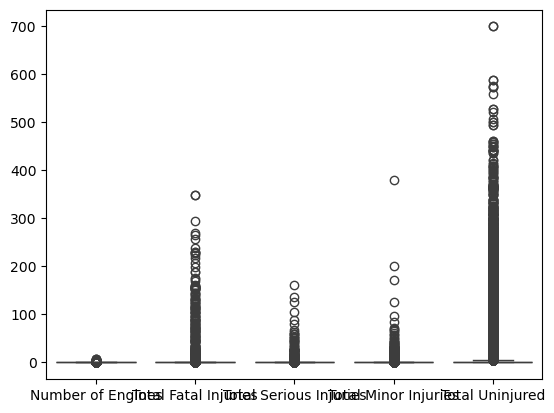

In [121]:
sns.boxplot(df)

## 9. Get Rid of Outliers

In [123]:
#Select numeric columns from the dataframe
numeric_columns = df.select_dtypes(include=["number"]).columns

#Calculate Q1, Q3 and IQR for the numeric columns
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3-Q1

#Define lower bounds and upper bounds for outlier removal
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Filter data to keep only numbers within the IQR bounds
no_outliers = df[(df[numeric_columns] >= lower_bound) & (df[numeric_columns] <= upper_bound)].dropna()

In [127]:
df

,Event Id,Investigation Type,Event Date,Location,Country,Latitude,Longitude,Airport Name,Injury Severity,Aircraft damage,...,Purpose of flight,Air carrier,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad phase of flight,Report Status,Publication Date
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",United States,332739N,0112457W,Private,Fatal(2),Destroyed,...,Personal,Pilot,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,25-09-2020
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",United States,332739N,0112457W,Private,Fatal(4),Destroyed,...,Personal,Pilot,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,Private,Fatal(3),Destroyed,...,Personal,Pilot,3.0,0.0,0.0,1.0,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",United States,332739N,0112457W,Private,Fatal(2),Destroyed,...,Personal,Pilot,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,1979-08-02,"Canton, OH",United States,332739N,0112457W,Private,Fatal(1),Destroyed,...,Personal,Pilot,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,2022-12-26,"Annapolis, MD",United States,332739N,0112457W,Private,Minor,Substantial,...,Personal,Pilot,0.0,1.0,0.0,0.0,VMC,Landing,Probable Cause,29-12-2022
88885,20221227106494,Accident,2022-12-26,"Hampton, NH",United States,332739N,0112457W,Private,Non-Fatal,Substantial,...,Personal,Pilot,0.0,0.0,0.0,0.0,VMC,Landing,Probable Cause,25-09-2020
88886,20221227106497,Accident,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAYSON,Non-Fatal,Substantial,...,Personal,Pilot,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,27-12-2022
88887,20221227106498,Accident,2022-12-26,"Morgan, UT",United States,332739N,0112457W,Private,Non-Fatal,Substantial,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,VMC,Landing,Probable Cause,25-09-2020


## 7. Parse and extract date information

In [130]:
# Confirm the column names
#print(df.columns)

# Parse date columns
df['Event Date'] = pd.to_datetime(df['Event Date'], errors='coerce', dayfirst=False)
df['Publication Date'] = pd.to_datetime(df['Publication Date'], errors='coerce', dayfirst=True)

# Extract year, month, and day from Event.Date
df['Event Year'] = df['Event Date'].dt.year
df['Event Month'] = df['Event Date'].dt.month
df['Event Day'] = df['Event Date'].dt.day

# Filter for years between 2012 and 2022
df = df[(df['Event Date'].dt.year >= 2012) & (df['Event Date'].dt.year <= 2022)]

print(df.head())
df.columns

             Event Id Investigation Type Event Date            Location  \
71225  20120102X93914           Accident 2012-01-01     Willimantic, CT   
71226  20120103X02043           Accident 2012-01-01            Lohn, TX   
71227  20111230X02532           Accident 2012-01-02          Eureka, CA   
71228  20120103X35104           Accident 2012-01-02     River Ranch, FL   
71229  20120103X94513           Accident 2012-01-02  Shelter Island, NY   

             Country Latitude Longitude          Airport Name Injury Severity  \
71225  United States  414430N  0721123W       Windham Airport       Non-Fatal   
71226  United States  311930N  0992430W               Private       Non-Fatal   
71227  United States  404812N  0124646W  Murray Field Airport       Non-Fatal   
71228  United States  027543N  0813448W           River Ranch       Non-Fatal   
71229  United States  004140N  0722035W   Klenawicus Airfield       Non-Fatal   

      Aircraft damage  ... Total Serious Injuries Total Minor 

Index(['Event Id', 'Investigation Type', 'Event Date', 'Location', 'Country',
       'Latitude', 'Longitude', 'Airport Name', 'Injury Severity',
       'Aircraft damage', 'Aircraft Category', 'Registration Number', 'Make',
       'Model', 'Amateur Built', 'Number of Engines', 'Engine Type',
       'Purpose of flight', 'Air carrier', 'Total Fatal Injuries',
       'Total Serious Injuries', 'Total Minor Injuries', 'Total Uninjured',
       'Weather Condition', 'Broad phase of flight', 'Report Status',
       'Publication Date', 'Event Year', 'Event Month', 'Event Day'],
      dtype='object')

## Aggregation

In [138]:
# Combine injury columns into a single metric
df.loc[:, 'Total Injuries'] = (
    df['Total Fatal Injuries'] +
    df['Total Serious Injuries'] +
    df['Total Minor Injuries'] +
    df['Total Uninjured']
)

# Compare the columns
print((df['Total Injuries'] == df['Total Injuries']).all())

# Standardize 'Weather Condition' values
if 'Weather Condition' in df.columns:
    df.loc[:, 'Weather Condition'] = df['Weather Condition'].replace({'UNK': 'Unknown'}).str.title()

# Check the updated output
print(df[['Total Injuries', 'Weather Condition']].head())

# Cap injury values at the 99th percentile
for col in ['Total Fatal Injuries', 'Total Serious Injuries', 'Total Minor Injuries', 'Total Injuries']:
    upper_limit = df[col].quantile(0.99)
    df.loc[:, col] = np.where(df[col] > upper_limit, upper_limit, df[col])


True
       Total Injuries Weather Condition
71225             1.0               Vmc
71226             2.0               Vmc
71227             1.0               Vmc
71228             3.0               Vmc
71229             1.0               Vmc


C:\Users\jackl\AppData\Local\Temp\ipykernel_20324\1228459721.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Total Injuries'] = (


## Weather Condition (Fill 'UNK' with 'Unknown'):

In [141]:
df.loc[:, 'Weather Condition'] = df['Weather Condition'].replace({'UNK': 'Unknown'}).str.title()
df['Weather Condition'] 

71225    Vmc
71226    Vmc
71227    Vmc
71228    Vmc
71229    Vmc
        ... 
88884    Vmc
88885    Vmc
88886    Vmc
88887    Vmc
88888    Vmc
Name: Weather Condition, Length: 17664, dtype: object

## Filling missing values in the 'Number.of.Engines' column with the median

In [144]:
df.loc[:, 'Number of Engines'] = df['Number of Engines'].fillna(df['Number of Engines'].median())
df['Number of Engines']

71225    1.0
71226    1.0
71227    1.0
71228    1.0
71229    2.0
        ... 
88884    1.0
88885    1.0
88886    1.0
88887    1.0
88888    1.0
Name: Number of Engines, Length: 17664, dtype: float64

## Categorical Columns (Fill with Mode)

In [147]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df.loc[:, col] = df[col].fillna(df[col].mode()[0])

## Top Aircraft Makes (Categorize Others as 'Other')

In [150]:
top_makes = df['Make'].value_counts().nlargest(10).index
df.loc[:, 'Make'] = df['Make'].apply(lambda x: x if x in top_makes else 'Other')

In [152]:
print(df['Weather Condition'].value_counts())
print(df['Injury Severity'].value_counts())

Weather Condition
Vmc    16788
Imc      622
Unk      254
Name: count, dtype: int64
Injury Severity
Non-Fatal    13513
Fatal         3760
Minor          218
Serious        173
Name: count, dtype: int64


In [154]:
print(df.shape)  # Check the number of rows and columns
print(df.head())  # View the first few rows of the DataFrame
df['Publication Date'] = df['Publication Date'].fillna(method='ffill')
# Use .loc to avoid SettingWithCopyWarning
df.loc[:, 'Publication Date'] = df['Publication Date'].ffill()  # Forward fill
df.loc[:, 'Publication Date'] = df['Publication Date'].bfill()  # Backward fill

(17664, 31)
             Event Id Investigation Type Event Date            Location  \
71225  20120102X93914           Accident 2012-01-01     Willimantic, CT   
71226  20120103X02043           Accident 2012-01-01            Lohn, TX   
71227  20111230X02532           Accident 2012-01-02          Eureka, CA   
71228  20120103X35104           Accident 2012-01-02     River Ranch, FL   
71229  20120103X94513           Accident 2012-01-02  Shelter Island, NY   

             Country Latitude Longitude          Airport Name Injury Severity  \
71225  United States  414430N  0721123W       Windham Airport       Non-Fatal   
71226  United States  311930N  0992430W               Private       Non-Fatal   
71227  United States  404812N  0124646W  Murray Field Airport       Non-Fatal   
71228  United States  027543N  0813448W           River Ranch       Non-Fatal   
71229  United States  004140N  0722035W   Klenawicus Airfield       Non-Fatal   

      Aircraft damage  ... Total Minor Injuries To

C:\Users\jackl\AppData\Local\Temp\ipykernel_20324\2803143896.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Publication Date'] = df['Publication Date'].fillna(method='ffill')
C:\Users\jackl\AppData\Local\Temp\ipykernel_20324\2803143896.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Publication Date'] = df['Publication Date'].fillna(method='ffill')


## Total  Accidents by Year

In [157]:
total_accidents = len(df)
print(f"Total Accidents (2012-2022): {total_accidents}")

Total Accidents (2012-2022): 17664


## Total Injuries

In [160]:
df.loc[:, 'Total Injuries'] = df[['Total Fatal Injuries', 'Total Serious Injuries', 'Total Minor Injuries']].sum(axis=1)
total_injuries = df['Total Injuries'].sum()
print(f"Total Number of Injuries: {total_injuries}")
print(df[['Total Fatal Injuries', 'Total Serious Injuries', 'Total Minor Injuries', 'Total Injuries']].head())

Total Number of Injuries: 14090.0
       Total Fatal Injuries  Total Serious Injuries  Total Minor Injuries  \
71225                   0.0                     0.0                   0.0   
71226                   0.0                     0.0                   2.0   
71227                   0.0                     0.0                   0.0   
71228                   0.0                     0.0                   0.0   
71229                   0.0                     0.0                   0.0   

       Total Injuries  
71225             0.0  
71226             2.0  
71227             0.0  
71228             0.0  
71229             0.0  


## Percentage of Fatal Accidents

In [188]:
fatal_injuries = df[df['Total Fatal Injuries'] > 0].shape[0]
percentage_fatal = (fatal_injuries / total_injuries) * 100
print(f"Percentage of Fatal Accidents: {percentage_fatal:.2f}%")

Percentage of Fatal Accidents: 26.52%


## Accident Severity (Fatal vs Non-Fatal)

In [166]:
fatal_accidents = df['Total Fatal Injuries'].sum()
non_fatal_accidents = df['Total Serious Injuries'].sum() + df['Total Minor Injuries'].sum()

print(f"Fatal Accidents: {fatal_accidents}")
print(f"Non-Fatal Accidents: {non_fatal_accidents}")

Fatal Accidents: 6857.0
Non-Fatal Accidents: 7233.0


## Most Common Aircraft Manufacturers

In [169]:
top_makes = df['Make'].value_counts().head(10)
print(top_makes)


Make
Other       8443
CESSNA      3409
PIPER       1964
BOEING       862
Cessna       783
BEECH        704
Piper        472
BELL         418
ROBINSON     220
AIRBUS       209
Name: count, dtype: int64


## Weather Conditions During Accidents

In [172]:
weather_conditions = df['Weather Condition'].value_counts()
print(weather_conditions)

Weather Condition
Vmc    16788
Imc      622
Unk      254
Name: count, dtype: int64


## Confirm the file's content

In [175]:
# Remaining missing values
print(df.isnull().sum())

# Final structure
print(df.info())

Event Id                  0
Investigation Type        0
Event Date                0
Location                  0
Country                   0
Latitude                  0
Longitude                 0
Airport Name              0
Injury Severity           0
Aircraft damage           0
Aircraft Category         0
Registration Number       0
Make                      0
Model                     0
Amateur Built             0
Number of Engines         0
Engine Type               0
Purpose of flight         0
Air carrier               0
Total Fatal Injuries      0
Total Serious Injuries    0
Total Minor Injuries      0
Total Uninjured           0
Weather Condition         0
Broad phase of flight     0
Report Status             0
Publication Date          0
Event Year                0
Event Month               0
Event Day                 0
Total Injuries            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 17664 entries, 71225 to 88888
Data columns (total 31 columns):
 #   Column

## Save the Cleaned Dataset

In [178]:
# Save cleaned dataset
df.to_csv('Cleaned_AviationDataset.csv', index=False)

## Conclusion

This notebook involved cleaning and analyzing aviation data. Missing values were handled, features were engineered, and outliers were addressed to ensure data quality. The cleaned dataset is now ready for further analysis or modeling.

The cleaned dataset is saved and ready for further use.

## Next Steps

1) Conduct further analysis.
2) Explore trends in aviation incidents.
3) Investigate relationships between aircraft types and injury severity.
4) Use the cleaned data to come up with visualizations and an interactive dashboard.